<a href="https://colab.research.google.com/github/maramification/Morphological-Operators/blob/main/Morphological_Operators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

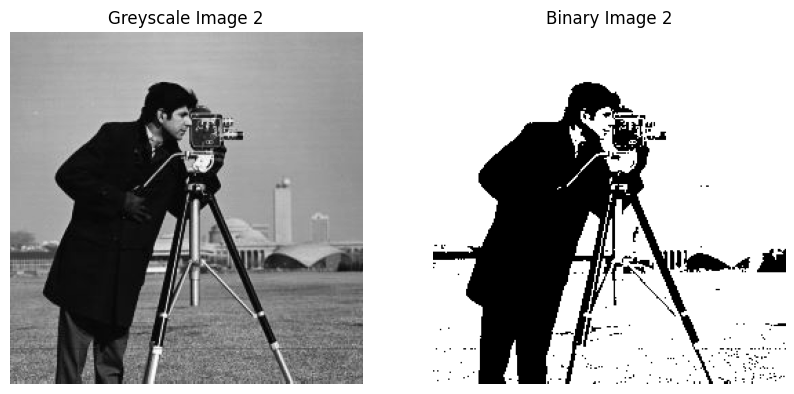

In [ ]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('Test Image 2.jpeg')
imgarray = np.array(img)

img1 = Image.open('Test Image 1.jpeg')
img1array = np.array(img1)

# greyscale
image2 = cv2.imread("Test Image 2.jpeg", cv2.IMREAD_GRAYSCALE)
image2_arr = np.array(image2)


image1 = cv2.imread("Test Image 1.jpeg", cv2.IMREAD_GRAYSCALE)
image1_arr = np.array(image1)

_, im1Binary_arr = otsu_threshold = cv2.threshold(image1_arr, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, im2Binary_arr = otsu_threshold = cv2.threshold(image2_arr, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

im1Binary = Image.fromarray(im1Binary_arr)
im2Binary = Image.fromarray(im2Binary_arr)



structElement = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)



# resultedImage = Image.fromarray(imgarray, mode="L")
# resultedImage = Image.fromarray(imgarray)
# plt.imshow(resultedImage, cmap="gray")


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title('Greyscale Image 2')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(im2Binary, cmap='gray')
plt.title('Binary Image 2')
plt.axis('off')

plt.show()

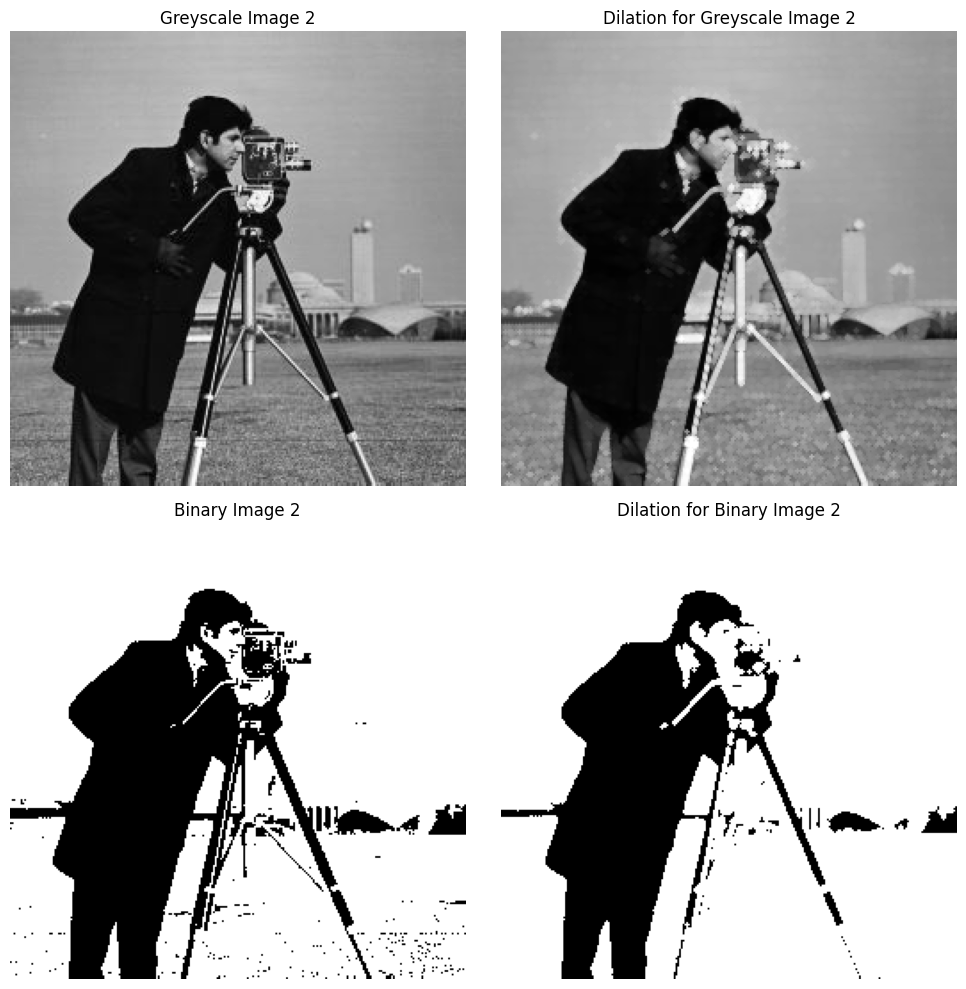

In [ ]:
# from PIL import Image
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt


def dilation(image, structElement):
    finalImage = np.zeros_like(image)
    padImg = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    for i in range(1, padImg.shape[0] - 1):
        for j in range(1, padImg.shape[1] - 1):
            temp = padImg[i - 1:i + 2, j - 1:j + 2]
            finalImage[i - 1, j - 1] = np.max(temp[structElement == 1])
    return finalImage



dilationFuncImg = dilation(image2, structElement)
dilationFuncBinaryImg = dilation(im2Binary, structElement)
# testingDilation = cv2.dilate(imgarray, structElement)

# plt.imshow(closingFuncImg, cmap="gray")
plt.figure(figsize=(10, 10))


plt.subplot(2, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title('Greyscale Image 2')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(dilationFuncImg, cmap='gray')
plt.title('Dilation for Greyscale Image 2')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(im2Binary, cmap='gray')
plt.title('Binary Image 2')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(dilationFuncBinaryImg, cmap='gray')
plt.title('Dilation for Binary Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()



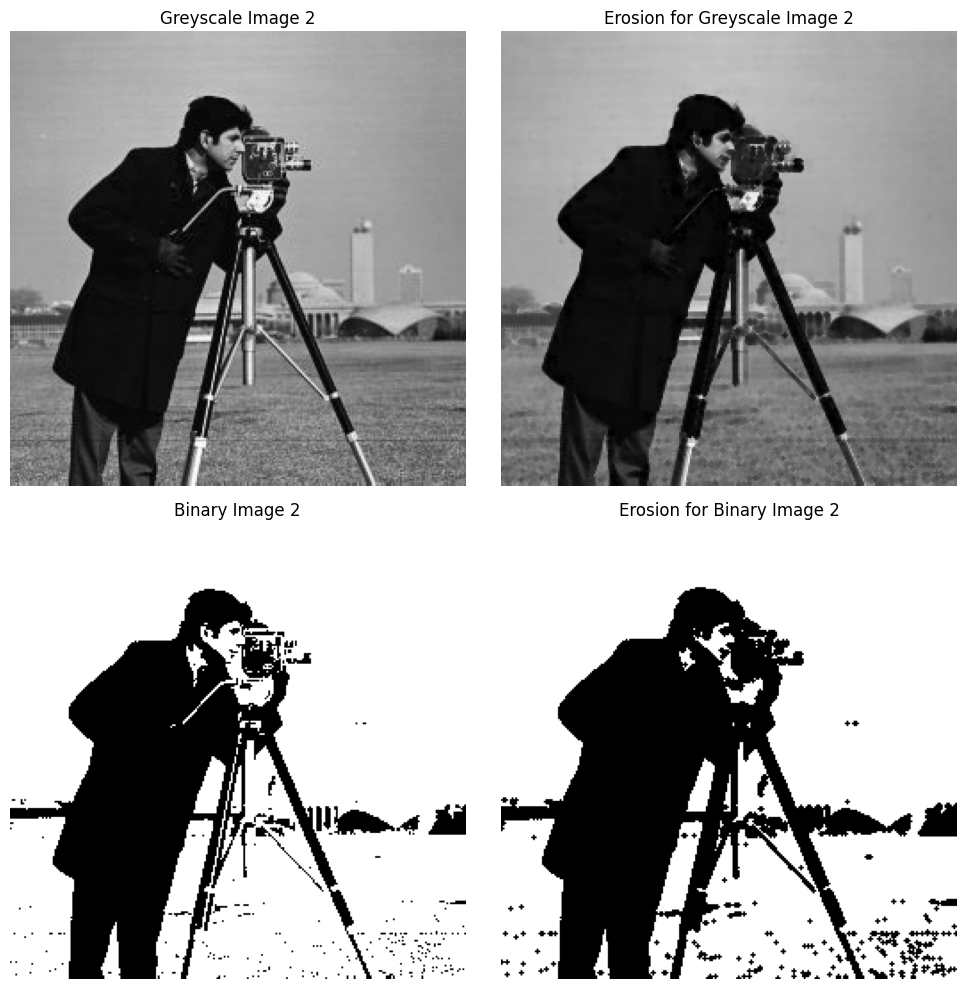

In [ ]:
# import cv2
# import numpy as np
# from PIL import Image
# import matplotlib.pyplot as plt


def erosion(image, structElement):
    finalImage = np.zeros_like(image)
    padImg = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=255)
    for i in range(1, padImg.shape[0] - 1):
        for j in range(1, padImg.shape[1] - 1):
            temp = padImg[i - 1:i + 2, j - 1:j + 2]
            finalImage[i - 1, j - 1] = np.min(temp[structElement == 1])
    return finalImage



erosionFuncImg = erosion(image2, structElement)
erosionFuncBinaryImg = erosion(im2Binary, structElement)
# testingErsosion = cv2.erode(imgarray, structElement)


plt.figure(figsize=(10, 10))


plt.subplot(2, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title('Greyscale Image 2')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(erosionFuncImg, cmap='gray')
plt.title('Erosion for Greyscale Image 2')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(im2Binary, cmap='gray')
plt.title('Binary Image 2')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(erosionFuncBinaryImg, cmap='gray')
plt.title('Erosion for Binary Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()






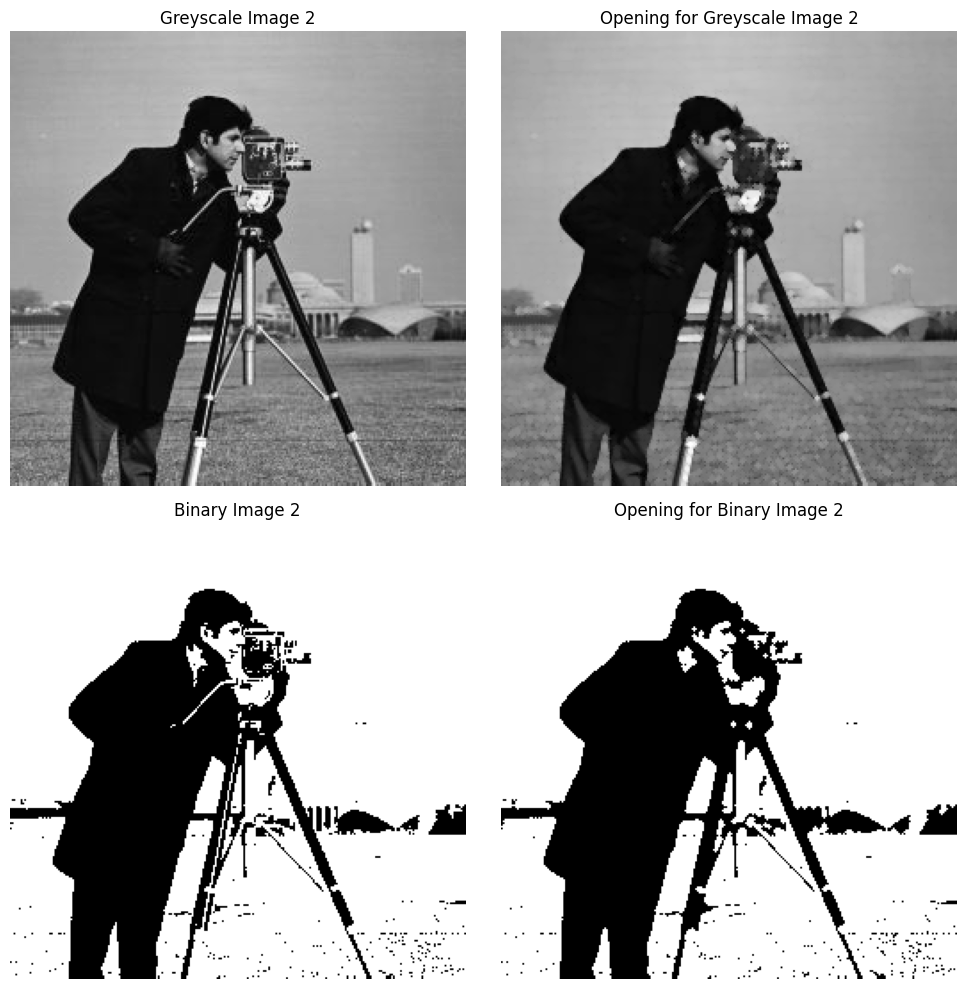

In [ ]:
def opening(image, structElement):
    return dilation(erosion(image, structElement), structElement)

openingFuncImg = opening(image2, structElement)
openingFuncBinaryImg = opening(im2Binary, structElement)
# testingOpening = cv2.morphologyEx(imgarray, cv2.MORPH_OPEN, structElement)

plt.figure(figsize=(10, 10))


plt.subplot(2, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title('Greyscale Image 2')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(openingFuncImg, cmap='gray')
plt.title('Opening for Greyscale Image 2')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(im2Binary, cmap='gray')
plt.title('Binary Image 2')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(openingFuncBinaryImg, cmap='gray')
plt.title('Opening for Binary Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()

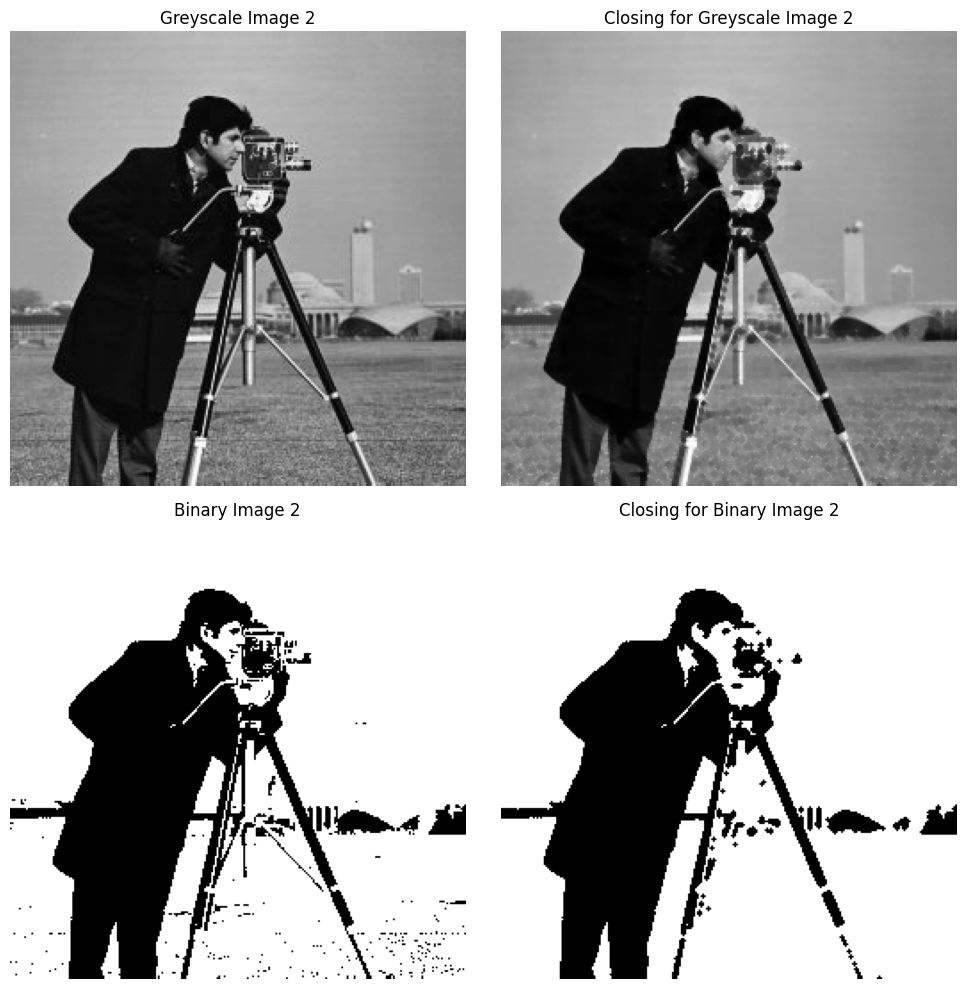

In [ ]:
def closing(image, structElement):
    return erosion(dilation(image, structElement), structElement)


closingFuncImg = closing(image2, structElement)
closingFuncImgBinary = closing(im2Binary, structElement)
# testingClosing = cv2.morphologyEx(imgarray, cv2.MORPH_CLOSE, structElement)


plt.figure(figsize=(10, 10))


plt.subplot(2, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title('Greyscale Image 2')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(closingFuncImg, cmap='gray')
plt.title('Closing for Greyscale Image 2')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(im2Binary, cmap='gray')
plt.title('Binary Image 2')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(closingFuncImgBinary, cmap='gray')
plt.title('Closing for Binary Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()




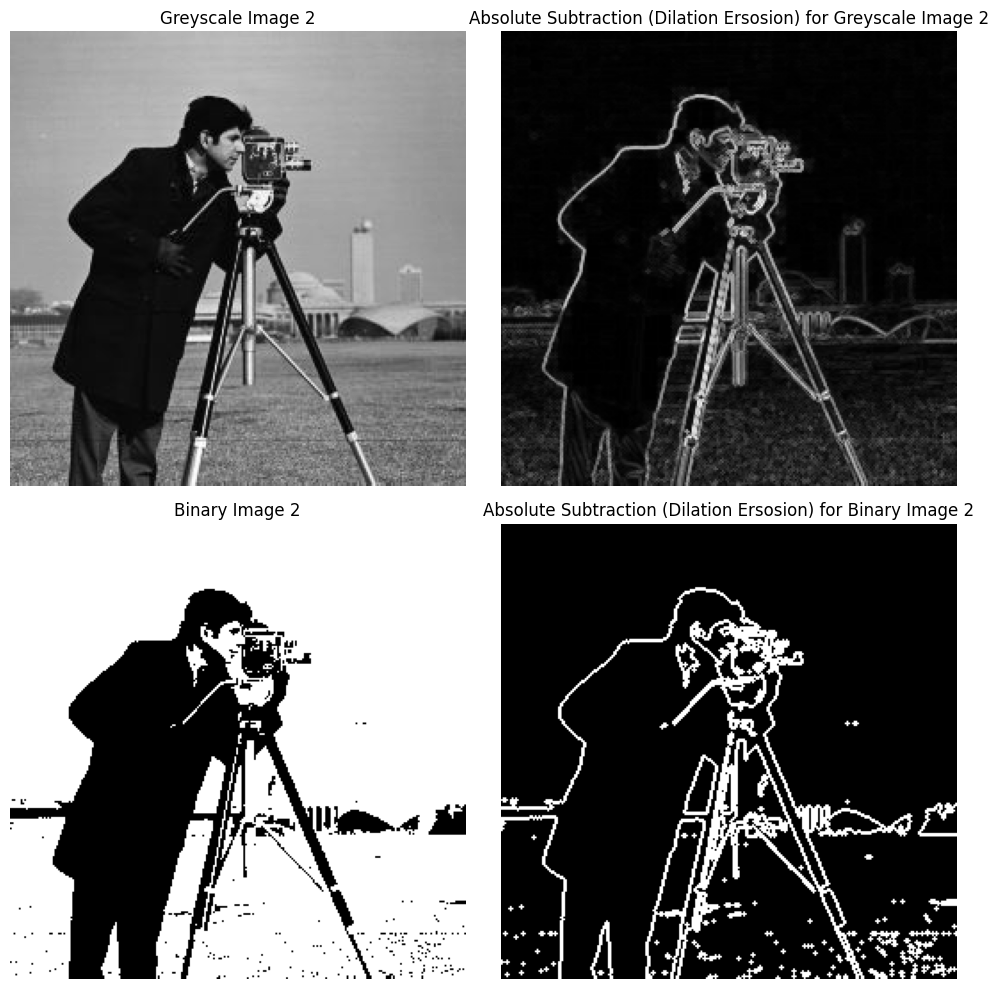

In [ ]:
def absSubDilationErsosion(image, structElement):
  dilatedImage = dilation(image, structElement)
  erodedImage = erosion(image, structElement)

  dilatedArray = np.array(dilatedImage)
  erodedArray = np.array(erodedImage)

  abs_sub = np.abs(dilatedArray - erodedArray)

  imageEq = Image.fromarray(abs_sub)
  return imageEq


absSubDilationErsosionFuncImg = absSubDilationErsosion(image2, structElement)
absSubDilationErsosionFuncBinaryImg = absSubDilationErsosion(im2Binary, structElement)
# testingAbsSubDilationErsosion = cv2.absdiff(dilationFuncImg, erosionFuncImg)

plt.figure(figsize=(10, 10))


plt.subplot(2, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title('Greyscale Image 2')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(absSubDilationErsosionFuncImg, cmap='gray')
plt.title('Absolute Subtraction (Dilation Ersosion) for Greyscale Image 2')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(im2Binary, cmap='gray')
plt.title('Binary Image 2')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(absSubDilationErsosionFuncBinaryImg, cmap='gray')
plt.title('Absolute Subtraction (Dilation Ersosion) for Binary Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()





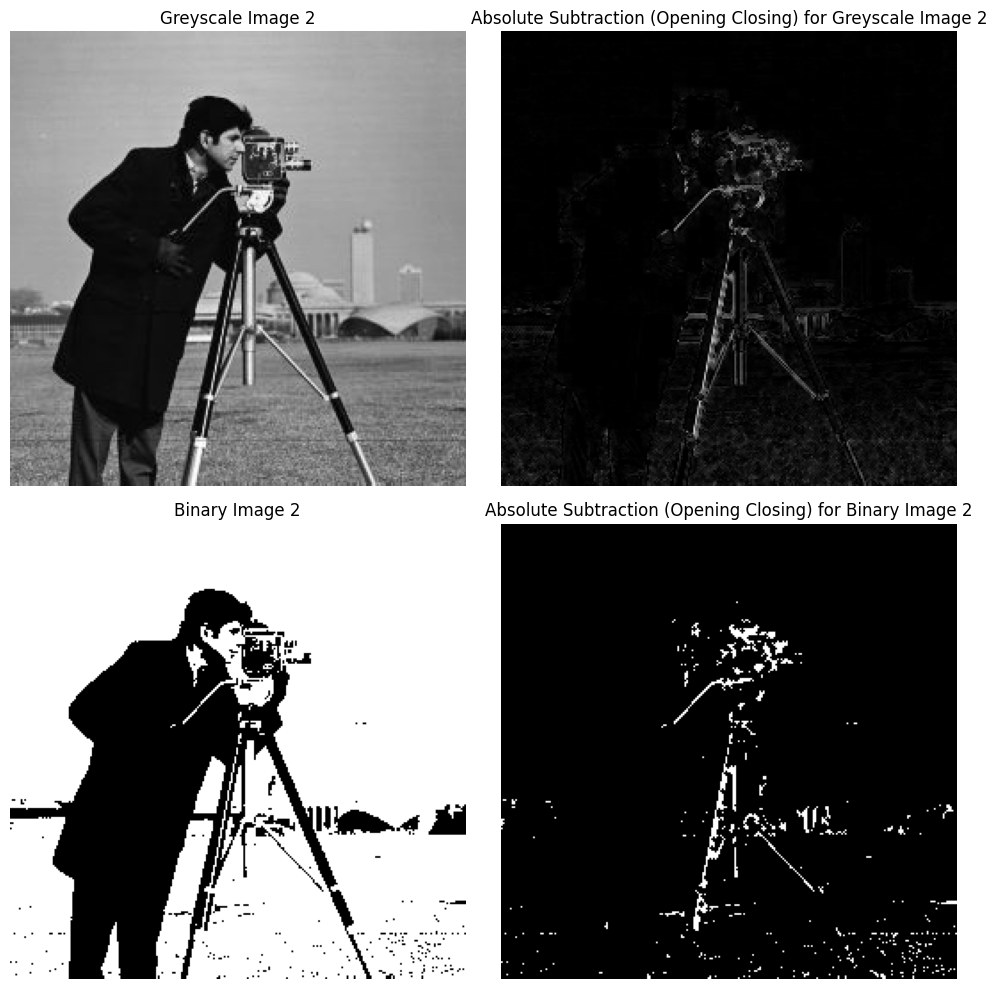

In [ ]:
def absSubOpeningClosing(image, structElement):
  openedImage = opening(image, structElement)
  openedImage = openedImage.astype(np.int32)
  closedImage = closing(image, structElement)
  closedImage = closedImage.astype(np.int32)

  openedArray = np.array(openedImage)
  closedArray = np.array(closedImage)

  abs_sub = np.abs(openedArray - closedArray)

  imageEq = Image.fromarray(abs_sub)
  return imageEq


absSubOpeningClosingFuncImg = absSubOpeningClosing(image2, structElement)
absSubOpeningClosingFuncBinaryImg = absSubOpeningClosing(im2Binary, structElement)
testingAbsSubOpeningClosing = cv2.absdiff(openingFuncBinaryImg, closingFuncImgBinary)


plt.figure(figsize=(10, 10))


plt.subplot(2, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title('Greyscale Image 2')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(absSubOpeningClosingFuncImg, cmap='gray')
plt.title('Absolute Subtraction (Opening Closing) for Greyscale Image 2')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(im2Binary, cmap='gray')
plt.title('Binary Image 2')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(absSubOpeningClosingFuncBinaryImg, cmap='gray')
plt.title('Absolute Subtraction (Opening Closing) for Binary Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()

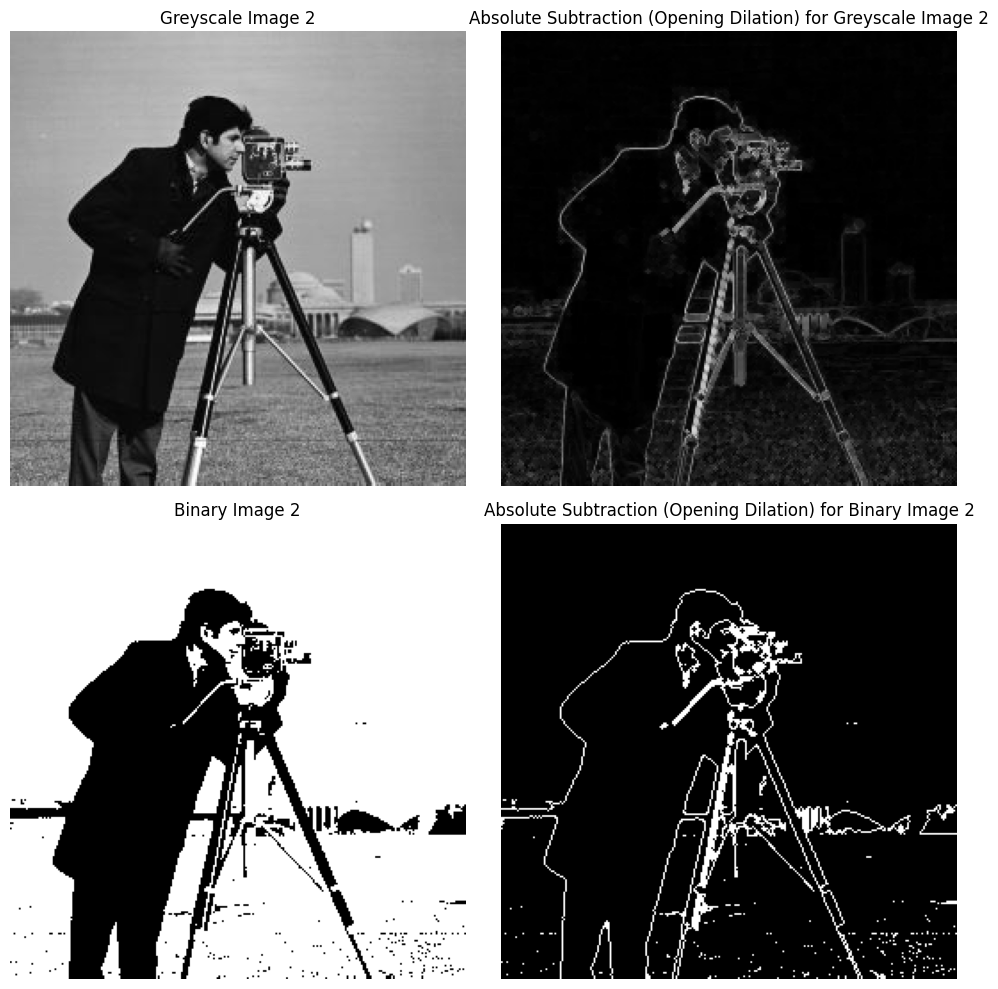

In [ ]:
def absSubOpeningDilation(image, structElement):
  openedImage = opening(image, structElement)
  openedImage = openedImage.astype(np.int32)
  dilatedImage = dilation(image, structElement)

  openedArray = np.array(openedImage)
  dilatedArray = np.array(dilatedImage)

  abs_sub = np.abs(openedArray - dilatedArray)

  imageEq = Image.fromarray(abs_sub)
  return imageEq


absSubOpeningDilationFuncImg = absSubOpeningDilation(image2, structElement)
absSubOpeningDilationFuncBinaryImg = absSubOpeningDilation(im2Binary, structElement)
# testingAbsSubOpeningDilation = cv2.absdiff(openingFuncImg, dilationFuncImg)
# testingAbsSubOpeningDilationBinary = cv2.absdiff(openingFuncBinaryImg, dilationFuncBinaryImg)


plt.figure(figsize=(10, 10))


plt.subplot(2, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title('Greyscale Image 2')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(absSubOpeningDilationFuncImg, cmap='gray')
plt.title('Absolute Subtraction (Opening Dilation) for Greyscale Image 2')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(im2Binary, cmap='gray')
plt.title('Binary Image 2')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(absSubOpeningDilationFuncBinaryImg, cmap='gray')
plt.title('Absolute Subtraction (Opening Dilation) for Binary Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()

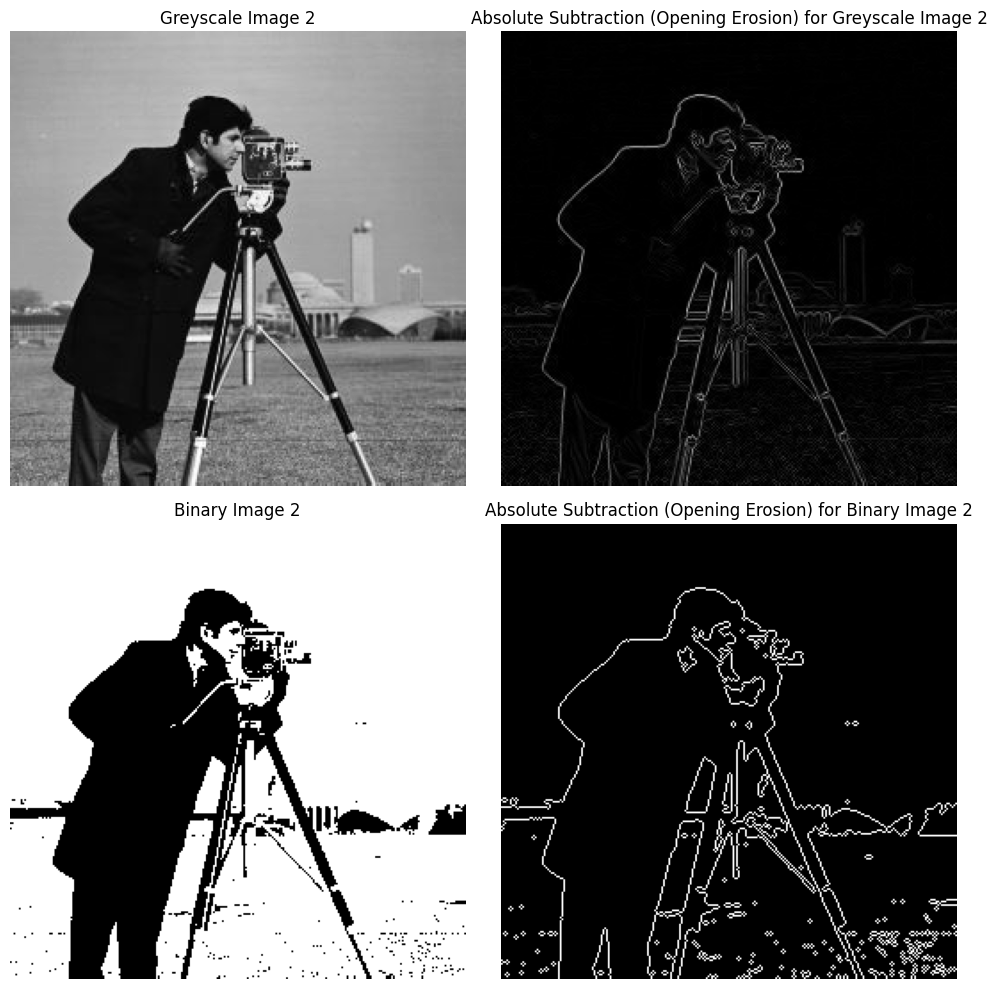

In [ ]:
def absSubOpeningErosion(image, structElement):
  openedImage = opening(image, structElement)
  openedImage = openedImage.astype(np.int32)
  erodedImage = erosion(image, structElement)

  openedArray = np.array(openedImage)
  erodedArray = np.array(erodedImage)

  abs_sub = np.abs(openedArray - erodedArray)

  imageEq = Image.fromarray(abs_sub)
  return imageEq


absSubOpeningErosionFuncImg = absSubOpeningErosion(image2, structElement)
absSubOpeningErosionFuncBinaryImg = absSubOpeningErosion(im2Binary, structElement)
# testingAbsSubOpeningErosion = cv2.absdiff(openingFuncImg, erosionFuncImg)
# testingAbsSubOpeningErosionBinary = cv2.absdiff(openingFuncBinaryImg, erosionFuncBinaryImg)


plt.figure(figsize=(10, 10))


plt.subplot(2, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title('Greyscale Image 2')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(absSubOpeningErosionFuncImg, cmap='gray')
plt.title('Absolute Subtraction (Opening Erosion) for Greyscale Image 2')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(im2Binary, cmap='gray')
plt.title('Binary Image 2')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(absSubOpeningErosionFuncBinaryImg, cmap='gray')
plt.title('Absolute Subtraction (Opening Erosion) for Binary Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()

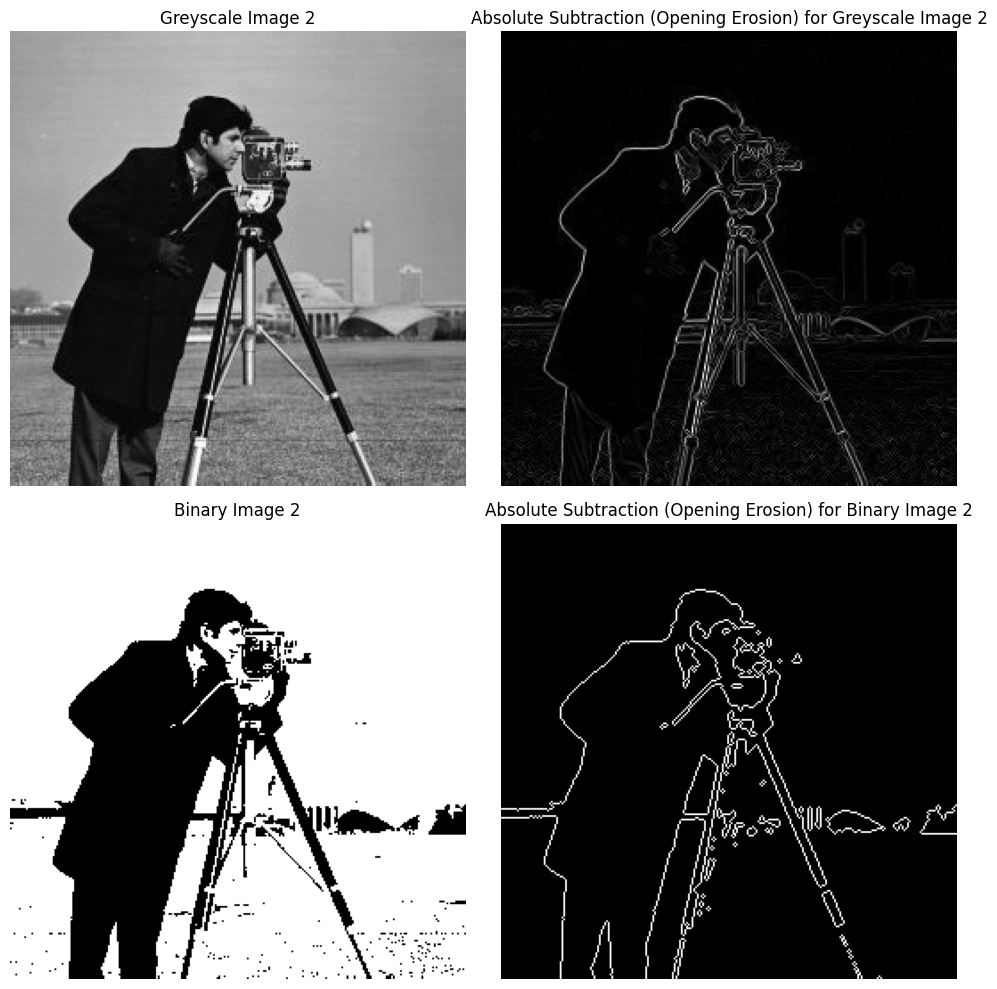

In [ ]:

def absSubClosingDilation(image, structElement):
  closedImage = closing(image, structElement)
  # closedImage = closedImage.astype(np.int32)
  dilatedImage = dilation(image, structElement)

  closedArray = np.array(closedImage, dtype=np.float32)
  dilatedArray = np.array(dilatedImage, dtype=np.float32)

  abs_sub = np.abs(closedArray - dilatedArray)
  abs_sub = np.uint8(abs_sub)

  imageEq = Image.fromarray(abs_sub)
  return imageEq


absSubClosingDilationFuncImg = absSubClosingDilation(image2, structElement)
absSubClosingDilationFuncBinaryImg = absSubClosingDilation(im2Binary, structElement)
testingAbsSubClosingDilation = cv2.absdiff(closingFuncImg, dilationFuncImg)
testingAbsSubClosingDilationBinary = cv2.absdiff(closingFuncImgBinary, dilationFuncBinaryImg)


plt.figure(figsize=(10, 10))


plt.subplot(2, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title('Greyscale Image 2')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(absSubClosingDilationFuncImg, cmap='gray')
plt.title('Absolute Subtraction (Opening Erosion) for Greyscale Image 2')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(im2Binary, cmap='gray')
plt.title('Binary Image 2')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(absSubClosingDilationFuncBinaryImg, cmap='gray')
plt.title('Absolute Subtraction (Opening Erosion) for Binary Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()

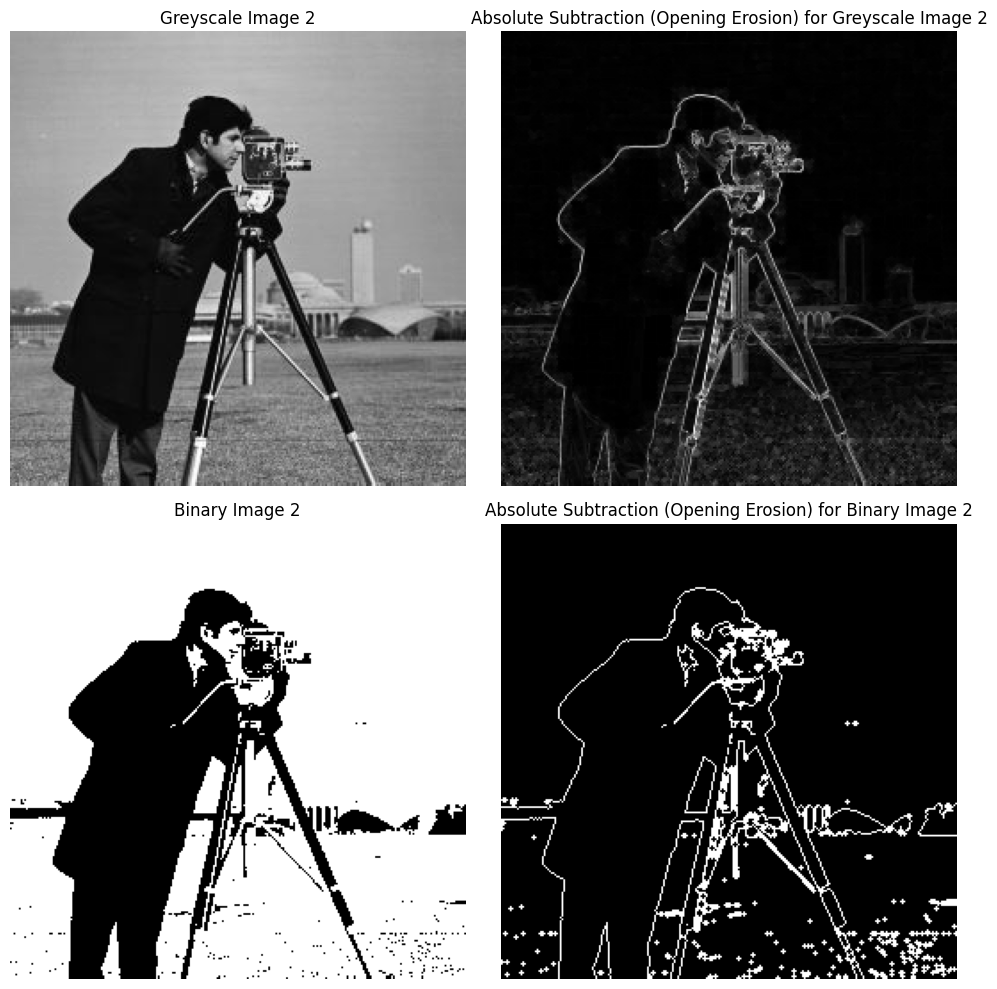

In [ ]:
#
def absSubClosingErosion(image, structElement):
  closedImage = closing(image, structElement)
  # closedImage = closedImage.astype(np.int32)
  erodedImage = erosion(image, structElement)

  closedArray = np.array(closedImage, dtype=np.float32)
  erodedArray = np.array(erodedImage, dtype=np.float32)

  abs_sub = np.abs(closedArray - erodedImage)
  abs_sub = np.uint8(abs_sub)

  imageEq = Image.fromarray(abs_sub)
  return imageEq


absSubClosingErosionFuncImg = absSubClosingErosion(image2, structElement)
absSubClosingErosionFuncBinaryImg = absSubClosingErosion(im2Binary, structElement)
# testingAbsSubClosingErosion = cv2.absdiff(closingFuncImg, erosionFuncImg)
# testingAbsSubClosingErosionBinary = cv2.absdiff(closingFuncImgBinary, erosionFuncBinaryImg)


plt.figure(figsize=(10, 10))


plt.subplot(2, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title('Greyscale Image 2')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(absSubClosingErosionFuncImg, cmap='gray')
plt.title('Absolute Subtraction (Opening Erosion) for Greyscale Image 2')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(im2Binary, cmap='gray')
plt.title('Binary Image 2')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(absSubClosingErosionFuncBinaryImg, cmap='gray')
plt.title('Absolute Subtraction (Opening Erosion) for Binary Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()